In [45]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, accuracy_score
from matplotlib import pyplot as plt

In [29]:
df = pd.read_csv('emails.csv')
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [30]:
# data before dropping duplicate
df.shape

(5728, 2)

In [31]:
df.columns

Index(['text', 'spam'], dtype='object')

In [32]:
df.drop_duplicates(inplace = True)

In [33]:
# data after dropping duplicate
df.shape

(5695, 2)

In [34]:
# check is there any null data
df.isnull().sum()

text    0
spam    0
dtype: int64

In [35]:
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goldi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
def process_text(text):
    # Remove Punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Return a list of clean words
    return clean_words

In [37]:
df['text'].head().apply(process_text)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [38]:
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

In [40]:
messages_bow.shape

(5695, 37229)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size = 0.2, random_state = 0)

In [41]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [42]:
# Print the predictions
print(classifier.predict(X_train))

# Print the actual values
print(y_train.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Accuracy: 99.71466198419667%


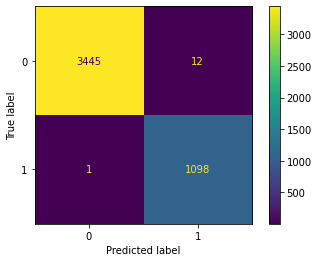

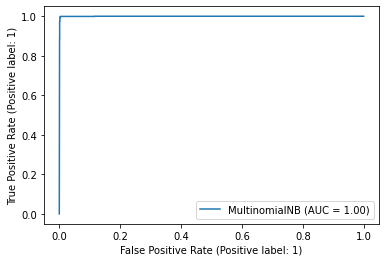

In [58]:
# Evaluate the model on the training data set
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred))
print()
print(f'Accuracy: {accuracy_score(y_train,pred) * 100}%')

plot_confusion_matrix(classifier, X_train, y_train)
plot_roc_curve(classifier, X_train, y_train)
plt.show()

In [26]:
# Print the predictions
print(f'Predicted value: {classifier.predict(X_test)}')

# Print Actual Label
print(f'Actual value: {y_test.values}')

Predicted value: [0 0 1 ... 1 0 1]
Actual value: [0 0 1 ... 0 0 1]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Accuracy: 99.20983318700614%


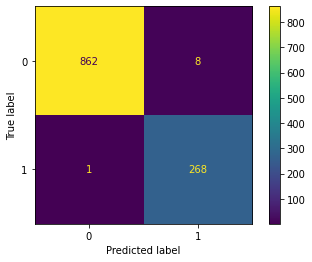

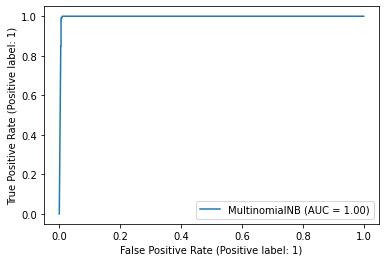

In [57]:
# Evaluate the model on the test data set
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred))
print()
print(f'Accuracy: {accuracy_score(y_test,pred) * 100}%')

plot_confusion_matrix(classifier, X_test, y_test)
plot_roc_curve(classifier, X_test, y_test)
plt.show()